# Laboratorio 5
#### Sebastian Aristondo 20880
#### Daniel Gonzalez 20293

In [31]:
import random
from PIL import Image
from IPython.display import display, Image as IPImage
import matplotlib.pyplot as plt

In [32]:
class Comprador:
    def __init__(self, nombre, presupuesto, preferencia_marca, preferencia_precio):
        self.nombre = nombre
        self.presupuesto = presupuesto
        self.preferencia_marca = preferencia_marca
        self.preferencia_precio = preferencia_precio
        self.tolerancia = random.randint(100, 500)
        self.presupuesto_inicial = presupuesto
        self.pertenencia=[0,0]
        
    def comprar(self):
        return True if random.random() < 0.4 else False
    
    def vender (self, Ganancias, producto):
        vendido = 0
        if Ganancias and producto.marca == self.preferencia_marca:
            self.presupuesto += producto.precio * self.pertenencia[0]
            vendido = self.pertenencia[0]
            self.pertenencia[0] = 0
        
        if Ganancias and producto.marca != self.preferencia_marca:
            self.presupuesto += producto.precio * self.pertenencia[1]
            vendido = self.pertenencia[1]
            self.pertenencia[1] = 0
        
        if not Ganancias and producto.marca != self.preferencia_marca:
            self.presupuesto += producto.precio * self.pertenencia[1]
            vendido = self.pertenencia[1]
            self.pertenencia[1] = 0
        return vendido
        
    def random_sell(self,producto):
        if producto.nombre == self.preferencia_marca:
            return random.random()< 0.1
        
        return random.random()< 0.5
    
    def accion (self, producto):
        cantidad_comprar = 0
        
        if self.random_sell(producto):
            return self.vender(True, producto)
        
        if producto.marca == self.preferencia_marca and producto.precio > self.preferencia_precio + self.tolerancia:
            return self.vender(True, producto)
        
        if producto.marca != self.preferencia_marca and producto.precio > self.preferencia_precio + self.tolerancia:
            return self.vender(True, producto)
        
        if self.presupuesto < self.presupuesto_inicial*0.2:
            return self.vender(False, producto)
            
        
        if producto.marca == self.preferencia_marca:
            posibles_compas = int(self.presupuesto // producto.precio)
            posibles_compas = min(posibles_compas,producto.Disponible)
            if producto.precio  > self.tolerancia - self.preferencia_precio and producto.precio < self.tolerancia + self.preferencia_precio:
                if posibles_compas > 0:
                    cantidad_comprar = random.randint(1, posibles_compas)
                    self.presupuesto -= cantidad_comprar * producto.precio
                    self.pertenencia[0] += cantidad_comprar
                    return -cantidad_comprar
        else:
            if self.comprar():
                posibles_compas = int(self.presupuesto // (producto.precio)//4)
                posibles_compas = min(posibles_compas,producto.Disponible)
                if producto.precio  > self.tolerancia - self.preferencia_precio and producto.precio < self.tolerancia + self.preferencia_precio:
                    if posibles_compas > 0:
                        cantidad_comprar = random.randint(1, posibles_compas)
                        self.presupuesto -= cantidad_comprar * producto.precio
                        self.pertenencia[1] += cantidad_comprar
                        return -cantidad_comprar
        return 0

In [33]:
class Producto:
    def __init__(self, nombre, precio, cantidad_disponible):
        self.nombre = nombre
        self.marca = nombre
        self.Valor_Total = precio
        self.Disponible = cantidad_disponible
        self.Total = cantidad_disponible
        self.precio = self.Valor_Total / self.Total

    def ajustar_precio(self, demanda):
        
        if random.random() < 0.4:
            self.precio *= 1.2
            return 
        if demanda > self.Total*0.2:
            self.precio *= 1.1  # Aumenta el precio si la demanda es alta
        else:
            self.precio *= 0.9  # Reduce el precio si la demanda es baja
            
        if self.precio <= self.Valor_Total*0.001:
            self.precio = self.Valor_Total*0.001
            print("Precio minimo alcanzado")


In [34]:
Producto1 = Producto("Apple", 200000, 100)
Producto2 = Producto("Samsung", 500000, 100)

Bolsa_valores = [Producto1, Producto2]

Fan_Apple1 = Comprador("Juan", 1000000,"Apple", 2000)
Fan_Apple2 = Comprador("Diego", 40000,"Apple", 1900)
Fan_Apple3 = Comprador("Manuel", 50000,"Apple", 1800)

Apple = [Fan_Apple1, Fan_Apple2, Fan_Apple3]

Fan_Samsung1 = Comprador("Pedro", 1000000,"Samsung", 5000)
Fan_Samsung2 = Comprador("Carlos", 40000,"Samsung", 4500)
Fan_Samsung3 = Comprador("Pablo", 50000,"Samsung", 5200)

Samsung = [Fan_Samsung1, Fan_Samsung2, Fan_Samsung3]


Dia:  1 Producto:  Apple Precio:  2000.0 Disponible:  100
Dia:  1 Producto:  Samsung Precio:  5000.0 Disponible:  100
Dia:  2 Producto:  Apple Precio:  1800.0 Disponible:  36
Dia:  2 Producto:  Samsung Precio:  6000.0 Disponible:  32
Dia:  3 Producto:  Apple Precio:  1620.0 Disponible:  8
Dia:  3 Producto:  Samsung Precio:  7200.0 Disponible:  100
Dia:  4 Producto:  Apple Precio:  1782.0000000000002 Disponible:  57
Dia:  4 Producto:  Samsung Precio:  6480.0 Disponible:  100
Dia:  5 Producto:  Apple Precio:  2138.4 Disponible:  56
Dia:  5 Producto:  Samsung Precio:  7776.0 Disponible:  100
Dia:  6 Producto:  Apple Precio:  2566.08 Disponible:  75
Dia:  6 Producto:  Samsung Precio:  9331.199999999999 Disponible:  100
Dia:  7 Producto:  Apple Precio:  2822.688 Disponible:  8
Dia:  7 Producto:  Samsung Precio:  8398.08 Disponible:  100
Dia:  8 Producto:  Apple Precio:  2540.4192000000003 Disponible:  100
Dia:  8 Producto:  Samsung Precio:  7558.272 Disponible:  100
Dia:  9 Producto:  Apple

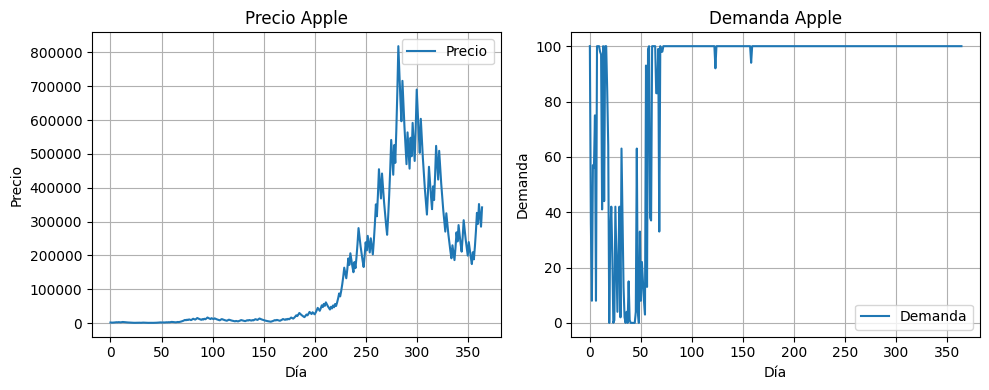

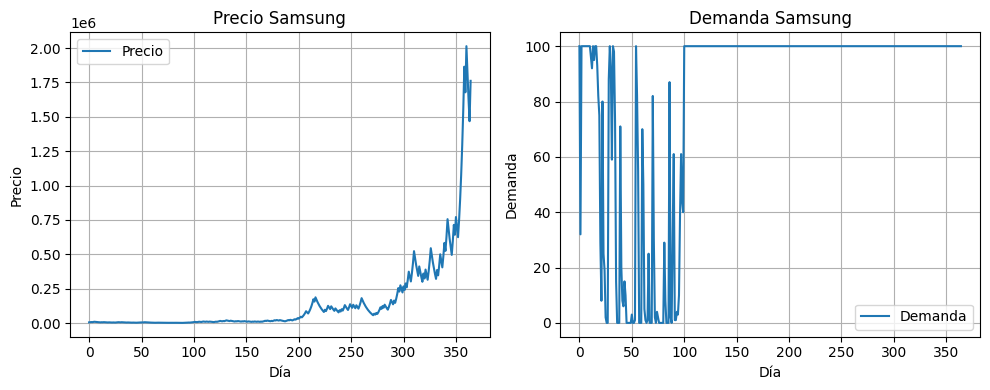

In [35]:
num_dias = 365
Precio_Apple = [0 for dia in range(num_dias)]
Demanda_Apple = [0 for dia in range(num_dias)]
Precio_Samsung = [0 for dia in range(num_dias)]
Demanda_Samsung = [0 for dia in range(num_dias)]
Precio_Apple[0] = Producto1.precio
Demanda_Apple[0] = Producto1.Disponible
Precio_Samsung[0] = Producto2.precio
Demanda_Samsung[0] = Producto2.Disponible
for dia in range(1,num_dias):
    
    for producto in Bolsa_valores:
        print("Dia: ", dia, "Producto: ", producto.nombre, "Precio: ", producto.precio, "Disponible: ", producto.Disponible)
        demanda_general = 0
        for comprador in Apple:
            demanda = 0
            demanda += comprador.accion(producto)
            producto.Disponible += demanda
            demanda_general += demanda

        for comprador in Samsung:
            demanda = 0
            demanda += comprador.accion(producto)
            producto.Disponible += demanda
            demanda_general
            
        producto.ajustar_precio(demanda_general)
        
        if producto.nombre == "Apple":
            Precio_Apple[dia] = producto.precio
            Demanda_Apple[dia] = producto.Disponible
        else:
            Precio_Samsung[dia] = producto.precio
            Demanda_Samsung[dia] = producto.Disponible
            

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(Precio_Apple, label="Precio")
ax1.set_title("Precio Apple")
ax1.set_xlabel("Día")
ax1.set_ylabel("Precio")
ax1.legend()
ax1.grid(True)

ax2.plot(Demanda_Apple, label="Demanda")
ax2.set_title("Demanda Apple")
ax2.set_xlabel("Día")
ax2.set_ylabel("Demanda")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show(True)

fig, (ax1_, ax2_) = plt.subplots(1, 2, figsize=(10, 4))
ax1_.plot(Precio_Samsung, label="Precio")
ax1_.set_title("Precio Samsung")
ax1_.set_xlabel("Día")
ax1_.set_ylabel("Precio")
ax1_.legend()
ax1_.grid(True)

ax2_.plot(Demanda_Samsung, label="Demanda")
ax2_.set_title("Demanda Samsung")
ax2_.set_xlabel("Día")
ax2_.set_ylabel("Demanda")
ax2_.legend()
ax2_.grid(True)

plt.tight_layout()
plt.show(True)



        
        

### Preguntas

5. ¿Qué comportamientos puede observar en los diferentes tipos de preferencias y estrategias?
6. ¿Cómo mejoraría este modelo?